In [1]:
'''
0411
try implementing ml to first several features and see how the results goes
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
feature_table = pd.read_csv("/Users/luxiaopeng/notebook/inls613/closure_prediction/feature_table.csv")
labels = np.array(feature_table[['open_round10']], dtype=int)
label_names = np.array(['open', 'not_open'])

feature_names = np.array(["uni_good_notext","uni_bad_notext","bi_sani_good_notext", \
                          "bi_sani_bad_notext","bi_loc_good_notext","bi_loc_bad_notext", \
                          "bi_service_good_notext","bi_service_bad_notext", \
                          "bi_taste_good_notext","bi_taste_bad_notext","chain", \
                          "review_star_coeffi_y","return_guest_count","mexican_food", \
                          "fast_food","american_food","thai_food","stars","review_count", \
                          "star_mean_difference_numerical","star_mean_difference_categorical"])

features = np.array(feature_table[["uni_good_notext","uni_bad_notext","bi_sani_good_notext", \
                          "bi_sani_bad_notext","bi_loc_good_notext","bi_loc_bad_notext", \
                          "bi_service_good_notext","bi_service_bad_notext", \
                          "bi_taste_good_notext","bi_taste_bad_notext","chain", \
                          "review_star_coeffi_y","return_guest_count","mexican_food", \
                          "fast_food","american_food","thai_food","stars","review_count", \
                          "star_mean_difference_numerical","star_mean_difference_categorical"]], dtype=float)

#try ml here

train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=37)

# Initialize our classifier
#clf = svm.SVC()
clf = LogisticRegression()
# Train our classifier
clf.fit(train, train_labels)

# Make predictions
preds = clf.predict(test)
# print(preds)
print(accuracy_score(test_labels, preds))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5909090909090909


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Container object of 21 artists>

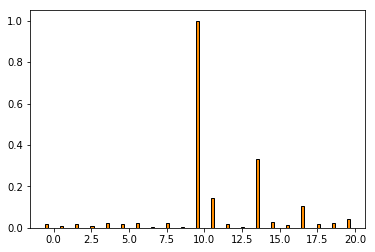

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif
X_indices = np.arange(train.shape[-1])
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(train, train_labels)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [2]:
# many thanks to code from https://github.com/alifier/Restaurant_success_model/blob/master/Restaurants_yelp_ML_final.ipynb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=37)
# logistic regression
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Accuracy:  0.5909090909090909
Precision:  0.6692913385826772
Recall:  0.397196261682243
F1 Score:  0.49853372434017595
Confusion Matrix: 
 [[162  42]
 [129  85]]


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# naive bayes
clf_A.fit(X_train,y_train)
y_pred_A = clf_A.predict(X_test)
print('Accuracy: ',clf_A.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_A))
print('Recall: ',recall_score(y_test,y_pred_A))
print('F1 Score: ',f1_score(y_test,y_pred_A))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_A))

Accuracy:  0.5789473684210527
Precision:  0.6079545454545454
Recall:  0.5
F1 Score:  0.5487179487179487
Confusion Matrix: 
 [[135  69]
 [107 107]]


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
clf_B.fit(X_train,y_train)
y_pred_B = clf_B.predict(X_test)
print('Accuracy: ',clf_B.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_B))
print('Recall: ',recall_score(y_test,y_pred_B))
print('F1 Score: ',f1_score(y_test,y_pred_B))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_B))

Accuracy:  0.5478468899521531
Precision:  0.5621890547263682
Recall:  0.5280373831775701
F1 Score:  0.544578313253012
Confusion Matrix: 
 [[116  88]
 [101 113]]


In [7]:
clf_C.fit(X_train,y_train)
y_pred_C = clf_C.predict(X_test)
print('Accuracy: ',clf_C.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_C))
print('Recall: ',recall_score(y_test,y_pred_C))
print('F1 Score: ',f1_score(y_test,y_pred_C))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_C))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.5956937799043063
Precision:  0.643312101910828
Recall:  0.4719626168224299
F1 Score:  0.5444743935309974
Confusion Matrix: 
 [[148  56]
 [113 101]]


In [8]:
clf_D.fit(X_train,y_train)
y_pred_D = clf_D.predict(X_test)
print('Accuracy: ',clf_D.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_D))
print('Recall: ',recall_score(y_test,y_pred_D))
print('F1 Score: ',f1_score(y_test,y_pred_D))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_D))

Accuracy:  0.569377990430622
Precision:  0.5965909090909091
Recall:  0.49065420560747663
F1 Score:  0.5384615384615384
Confusion Matrix: 
 [[133  71]
 [109 105]]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


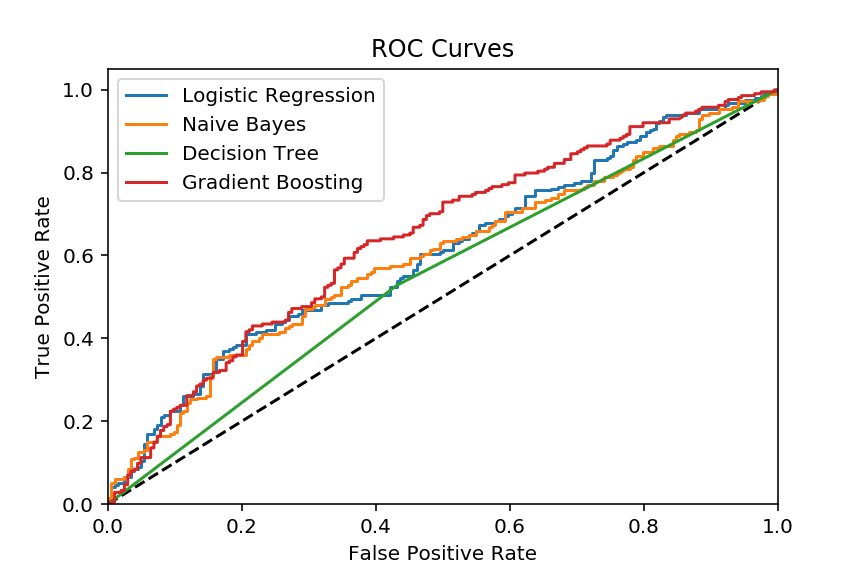

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
y_score = clf.decision_function(X_test)
y_score_A = clf_A.predict_proba(X_test)[:,1]
y_score_B = clf_B.predict_proba(X_test)[:,1]
y_score_C = clf_C.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test,y_score)
fpr_A, tpr_A, _ = roc_curve(y_test,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test,y_score_C)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_A,tpr_A,label='Naive Bayes')
plt.plot(fpr_B,tpr_B,label='Decision Tree')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [138]:
np.std(X_train, 0)*clf.coef_

array([[-0.02041152, -0.00606235, -0.01410216,  0.00995115,  0.11154586,
        -0.04086575, -0.04244665, -0.17765198,  0.22776832, -0.11106938,
         0.58600342,  0.27840706,  0.04585028, -0.02339298,  0.09398147,
        -0.07067449, -0.01579502, -0.00116923,  0.12321837,  0.00488463,
        -0.01259873]])

In [11]:
importance = np.std(X_train, 0)*clf.coef_
importance = importance.reshape(-1)
#importance =importance + np.abs(np.min(importance))
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, feature_names[f], importance[f]))

1. feature: uni_good_notext (-0.019570)
2. feature: uni_bad_notext (-0.006445)
3. feature: bi_sani_good_notext (-0.013728)
4. feature: bi_sani_bad_notext (0.008630)
5. feature: bi_loc_good_notext (0.111653)
6. feature: bi_loc_bad_notext (-0.040057)
7. feature: bi_service_good_notext (-0.042285)
8. feature: bi_service_bad_notext (-0.176507)
9. feature: bi_taste_good_notext (0.227788)
10. feature: bi_taste_bad_notext (-0.111045)
11. feature: chain (0.585591)
12. feature: review_star_coeffi_y (0.278431)
13. feature: return_guest_count (0.046077)
14. feature: mexican_food (-0.022933)
15. feature: fast_food (0.094335)
16. feature: american_food (-0.071350)
17. feature: thai_food (-0.015465)
18. feature: stars (-0.001515)
19. feature: review_count (0.121413)
20. feature: star_mean_difference_numerical (0.004772)
21. feature: star_mean_difference_categorical (-0.012499)


<IPython.core.display.Javascript object>


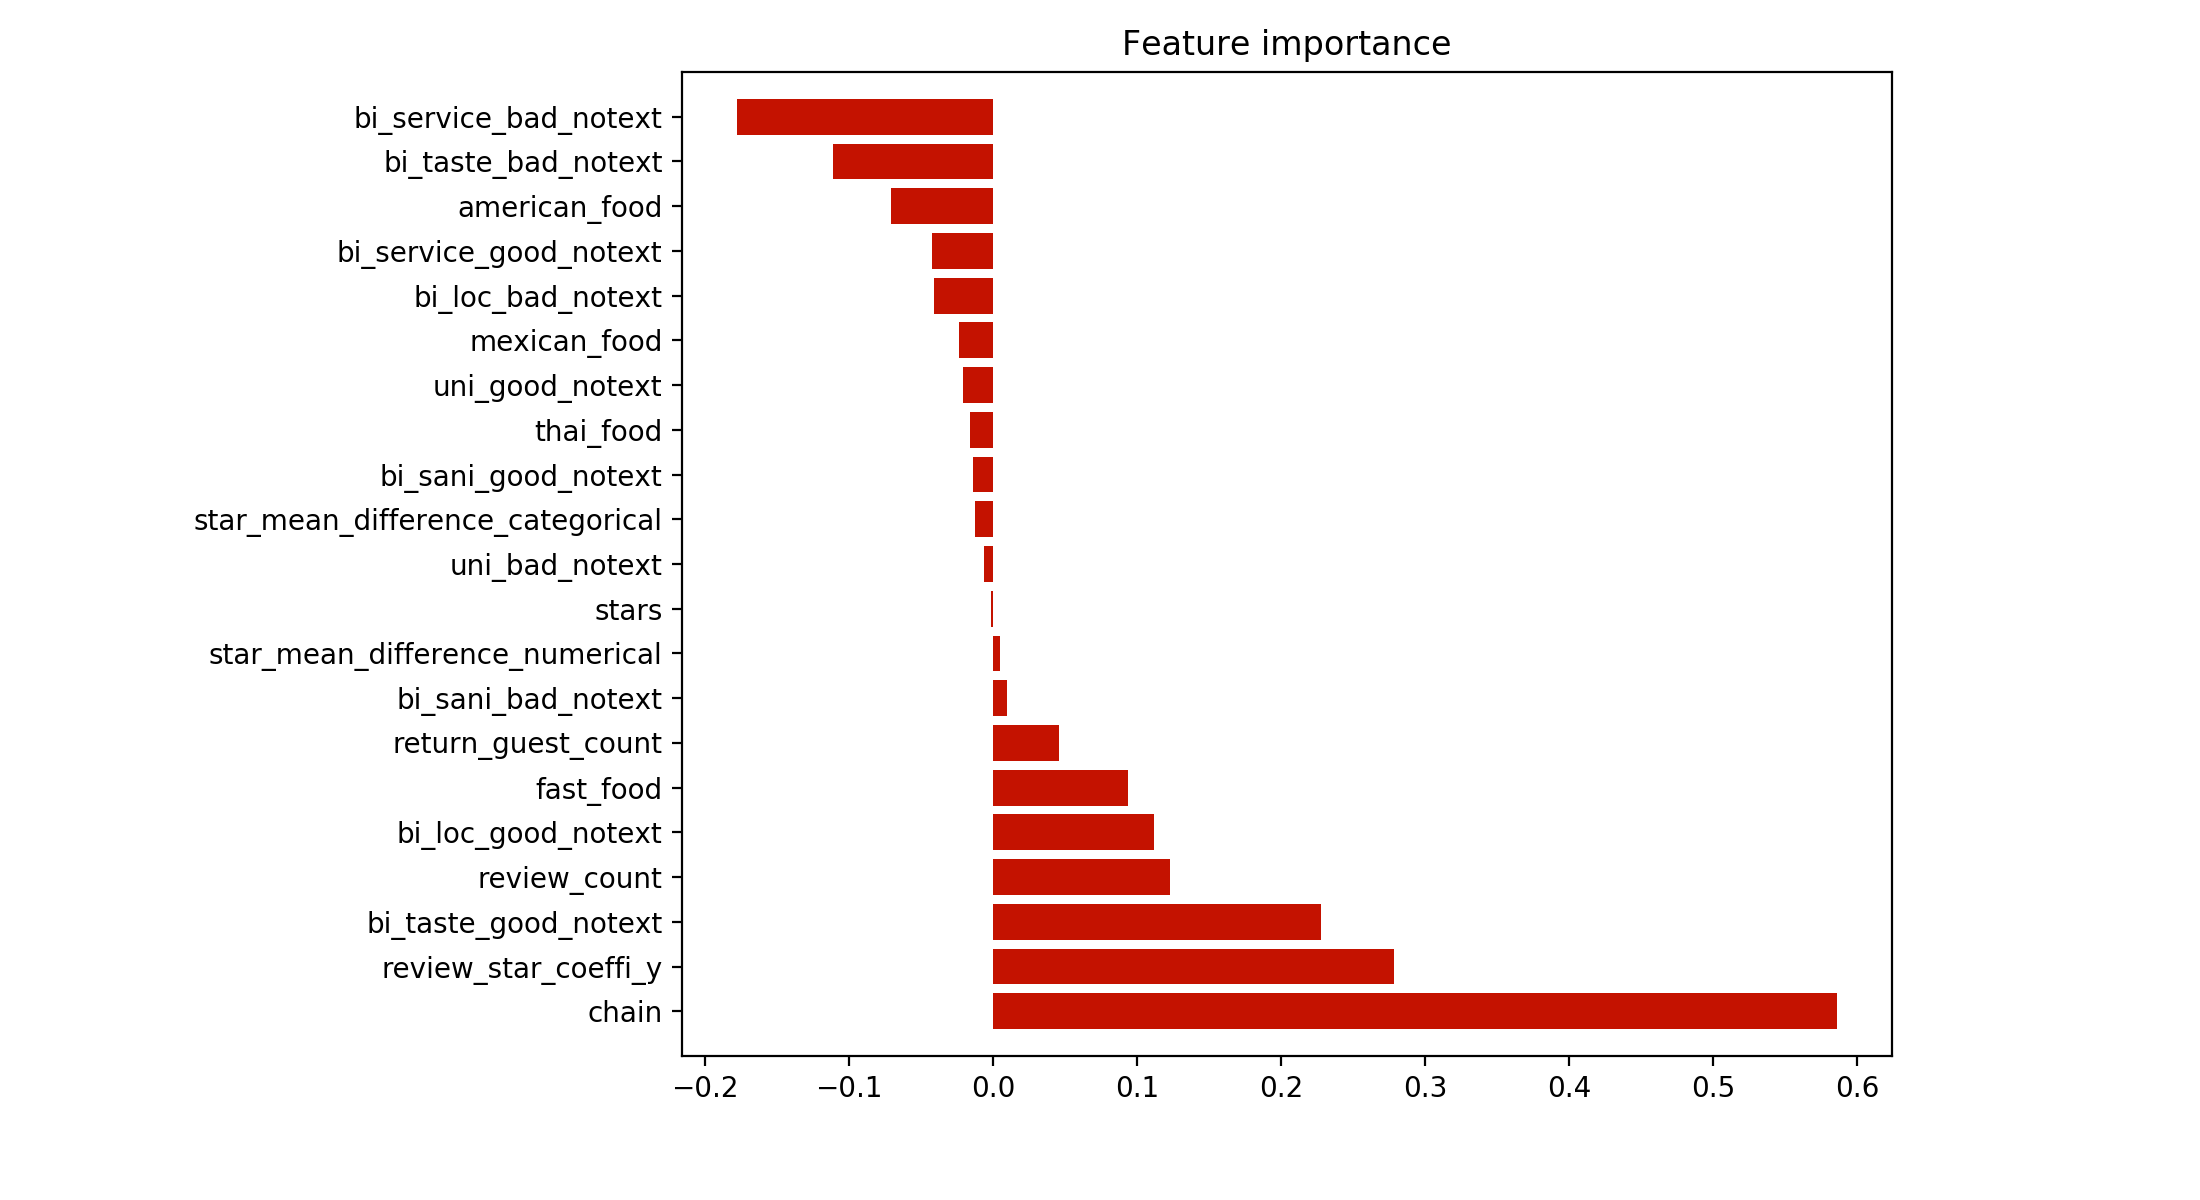

In [197]:
std = np.std(X_train, 0)*clf.coef_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(11,6))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importance[indices],
       color="#c41200")
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X_test.shape[1]])
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.31, bottom=0.12, right=0.86, top=0.94)

In [198]:
# scaling features as alifier did 
from sklearn.preprocessing import StandardScaler

In [200]:
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

In [201]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(features_scaled,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=37)

In [202]:
clf.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = clf.predict(X_test_scaled)
print('Accuracy: ',clf.score(X_test_scaled,y_test_scaled))
print('Precision: ',precision_score(y_test_scaled,y_pred_scaled)) # tp / (tp + fp)
print('Recall: ',recall_score(y_test_scaled,y_pred_scaled))
print('F1 Score: ',f1_score(y_test_scaled,y_pred_scaled))
print('Confusion Matrix: \n',confusion_matrix(y_test_scaled, y_pred_scaled))

Accuracy:  0.5885167464114832
Precision:  0.6640625
Recall:  0.397196261682243
F1 Score:  0.4970760233918128
Confusion Matrix: 
 [[161  43]
 [129  85]]


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[162  42]
 [129  85]]


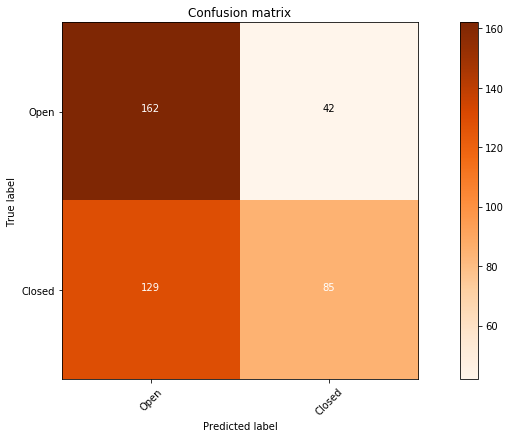

In [228]:
import itertools
from importlib import reload
%matplotlib inline
reload(plt)
fig = plt.gcf()
fig.set_size_inches(12, 6)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_matrix(y_test, y_pred),\
                          classes=['Open','Closed'],title='Confusion matrix')

<IPython.core.display.Javascript object>


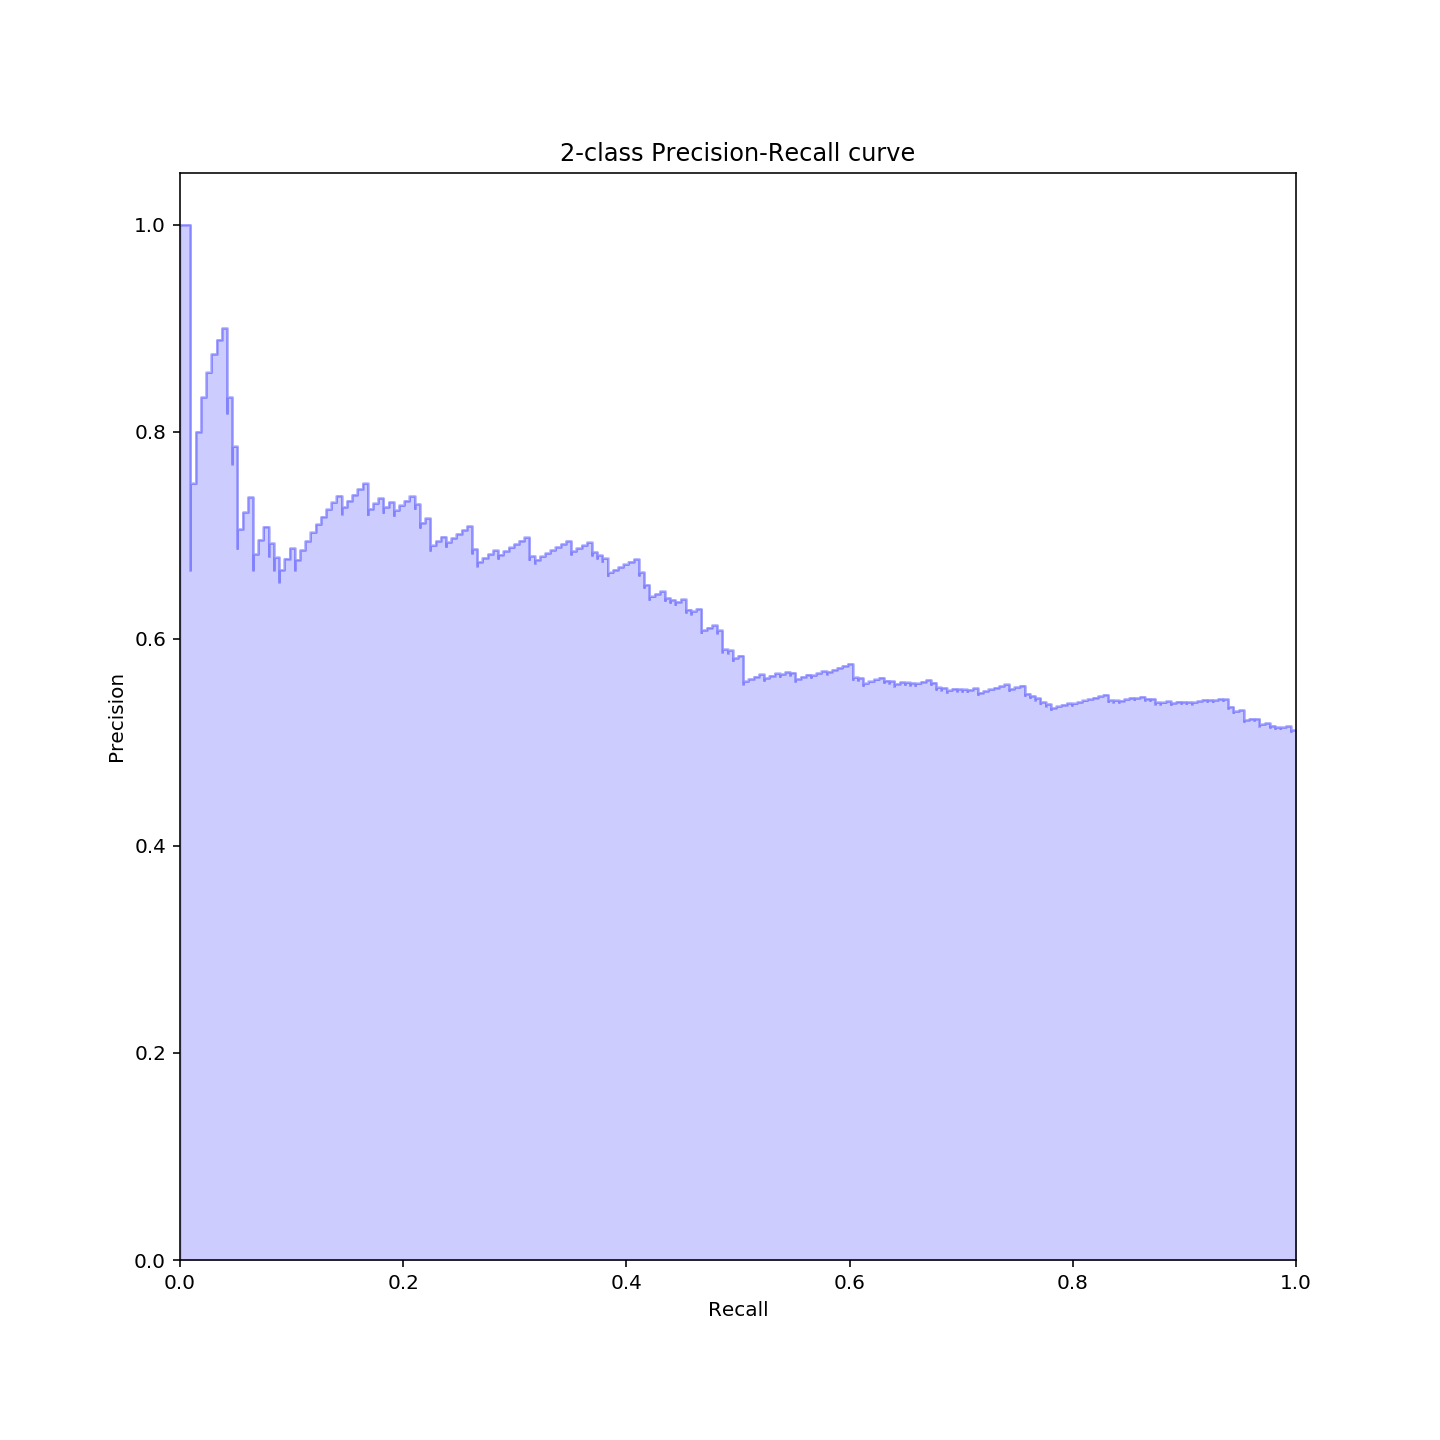

Text(0.5,1,'2-class Precision-Recall curve')

In [17]:
# try precision recall curve
%matplotlib notebook
fig = plt.gcf()
fig.set_size_inches(10, 10)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')

In [1]:
'''
0505
try implementing ml with word2vec added
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
feature_table = pd.read_csv("/Users/luxiaopeng/notebook/inls613/closure_prediction/feature_table_with_w2c.csv")
labels = np.array(feature_table[['open_round10']], dtype=int)
label_names = np.array(['open', 'not_open'])

feature_names = np.array(["uni_good_notext","uni_bad_notext","bi_sani_good_notext", \
                          "bi_sani_bad_notext","bi_loc_good_notext","bi_loc_bad_notext", \
                          "bi_service_good_notext","bi_service_bad_notext", \
                          "bi_taste_good_notext","bi_taste_bad_notext","chain", \
                          "review_star_coeffi_y","return_guest_count","mexican_food", \
                          "fast_food","american_food","thai_food","stars","review_count", \
                          "star_mean_difference_numerical","star_mean_difference_categorical", \
                        "1mile_comaparison_star","2mile_comaparison_star", \
                        "3mile_comaparison_star","per_capita_income_2016_normalized", \
                        "uni_good_notext_more","uni_bad_notext_more", \
                        "bi_sani_good_notext_more","bi_sani_bad_notext_more", \
                        "bi_loc_good_notext_more","bi_loc_bad_notext_more", \
                        "bi_service_good_notext_more","bi_service_bad_notext_more", \
                        "bi_taste_good_notext_more","bi_taste_bad_notext_more"])

features = np.array(feature_table[["uni_good_notext","uni_bad_notext","bi_sani_good_notext", \
                          "bi_sani_bad_notext","bi_loc_good_notext","bi_loc_bad_notext", \
                          "bi_service_good_notext","bi_service_bad_notext", \
                          "bi_taste_good_notext","bi_taste_bad_notext","chain", \
                          "review_star_coeffi_y","return_guest_count","mexican_food", \
                          "fast_food","american_food","thai_food","stars","review_count", \
                          "star_mean_difference_numerical","star_mean_difference_categorical", \
                          "1mile_comaparison_star","2mile_comaparison_star", \
                        "3mile_comaparison_star","per_capita_income_2016_normalized", \
                        "uni_good_notext_more","uni_bad_notext_more", \
                        "bi_sani_good_notext_more","bi_sani_bad_notext_more", \
                        "bi_loc_good_notext_more","bi_loc_bad_notext_more", \
                        "bi_service_good_notext_more","bi_service_bad_notext_more", \
                        "bi_taste_good_notext_more","bi_taste_bad_notext_more"]], dtype=float)

#try ml here

train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=37)

# Initialize our classifier
#clf = svm.SVC()
clf = LogisticRegression()
# Train our classifier
clf.fit(train, train_labels)

# Make predictions
preds = clf.predict(test)
# print(preds)
print(accuracy_score(test_labels, preds))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6028708133971292


In [2]:
# many thanks to code from https://github.com/alifier/Restaurant_success_model/blob/master/Restaurants_yelp_ML_final.ipynb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=37)
# logistic regression
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Accuracy:  0.6052631578947368
Precision:  0.6666666666666666
Recall:  0.45794392523364486
F1 Score:  0.5429362880886426
Confusion Matrix: 
 [[155  49]
 [116  98]]


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
# naive bayes
clf_A.fit(X_train,y_train)
y_pred_A = clf_A.predict(X_test)
print('Accuracy: ',clf_A.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_A))
print('Recall: ',recall_score(y_test,y_pred_A))
print('F1 Score: ',f1_score(y_test,y_pred_A))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_A))

Accuracy:  0.5023923444976076
Precision:  0.5083333333333333
Recall:  0.8551401869158879
F1 Score:  0.6376306620209059
Confusion Matrix: 
 [[ 27 177]
 [ 31 183]]


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
clf_B.fit(X_train,y_train)
y_pred_B = clf_B.predict(X_test)
print('Accuracy: ',clf_B.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_B))
print('Recall: ',recall_score(y_test,y_pred_B))
print('F1 Score: ',f1_score(y_test,y_pred_B))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_B))

Accuracy:  0.5980861244019139
Precision:  0.6095238095238096
Recall:  0.5981308411214953
F1 Score:  0.6037735849056604
Confusion Matrix: 
 [[122  82]
 [ 86 128]]


In [5]:
clf_C.fit(X_train,y_train)
y_pred_C = clf_C.predict(X_test)
print('Accuracy: ',clf_C.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_C))
print('Recall: ',recall_score(y_test,y_pred_C))
print('F1 Score: ',f1_score(y_test,y_pred_C))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_C))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.6028708133971292
Precision:  0.6318681318681318
Recall:  0.5373831775700935
F1 Score:  0.5808080808080808
Confusion Matrix: 
 [[137  67]
 [ 99 115]]


In [6]:
clf_D.fit(X_train,y_train)
y_pred_D = clf_D.predict(X_test)
print('Accuracy: ',clf_D.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred_D))
print('Recall: ',recall_score(y_test,y_pred_D))
print('F1 Score: ',f1_score(y_test,y_pred_D))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_D))

Accuracy:  0.5550239234449761
Precision:  0.5760869565217391
Recall:  0.4953271028037383
F1 Score:  0.5326633165829145
Confusion Matrix: 
 [[126  78]
 [108 106]]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


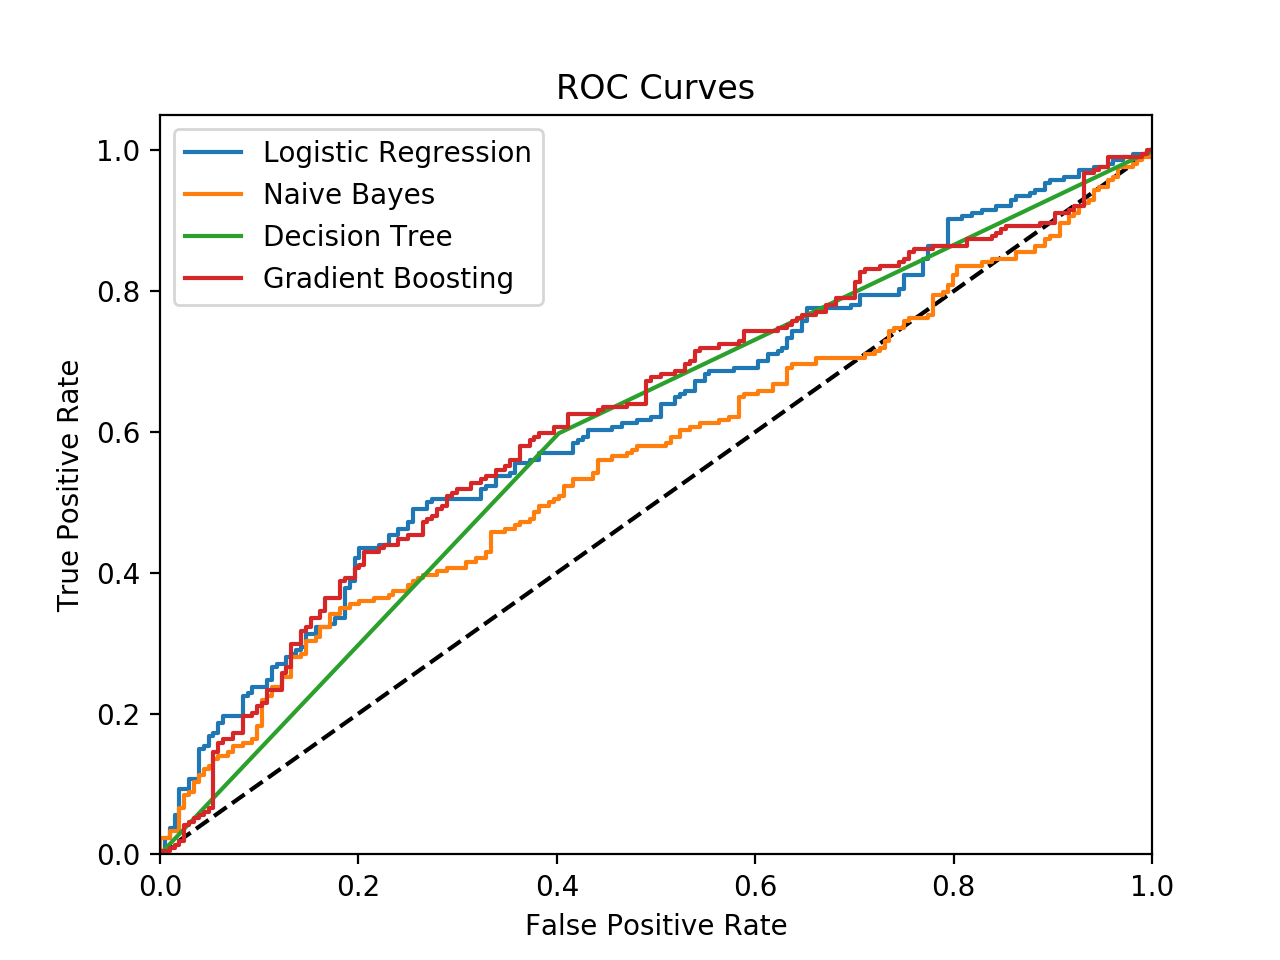

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
y_score = clf.decision_function(X_test)
y_score_A = clf_A.predict_proba(X_test)[:,1]
y_score_B = clf_B.predict_proba(X_test)[:,1]
y_score_C = clf_C.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test,y_score)
fpr_A, tpr_A, _ = roc_curve(y_test,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test,y_score_C)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_A,tpr_A,label='Naive Bayes')
plt.plot(fpr_B,tpr_B,label='Decision Tree')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [8]:
importance = np.std(X_train, 0)*clf.coef_
importance = importance.reshape(-1)
#importance =importance + np.abs(np.min(importance))
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, feature_names[f], importance[f]))

1. feature: uni_good_notext (0.090586)
2. feature: uni_bad_notext (-0.029959)
3. feature: bi_sani_good_notext (-0.158338)
4. feature: bi_sani_bad_notext (0.045745)
5. feature: bi_loc_good_notext (-0.541965)
6. feature: bi_loc_bad_notext (0.010909)
7. feature: bi_service_good_notext (1.941976)
8. feature: bi_service_bad_notext (0.609509)
9. feature: bi_taste_good_notext (0.380085)
10. feature: bi_taste_bad_notext (-0.000952)
11. feature: chain (0.599519)
12. feature: review_star_coeffi_y (0.276901)
13. feature: return_guest_count (0.082908)
14. feature: mexican_food (-0.035442)
15. feature: fast_food (0.087885)
16. feature: american_food (-0.041013)
17. feature: thai_food (-0.035103)
18. feature: stars (0.147457)
19. feature: review_count (-0.326822)
20. feature: star_mean_difference_numerical (-0.004737)
21. feature: star_mean_difference_categorical (0.004658)
22. feature: 1mile_comaparison_star (0.793693)
23. feature: 2mile_comaparison_star (0.048334)
24. feature: 3mile_comaparison_st

<IPython.core.display.Javascript object>


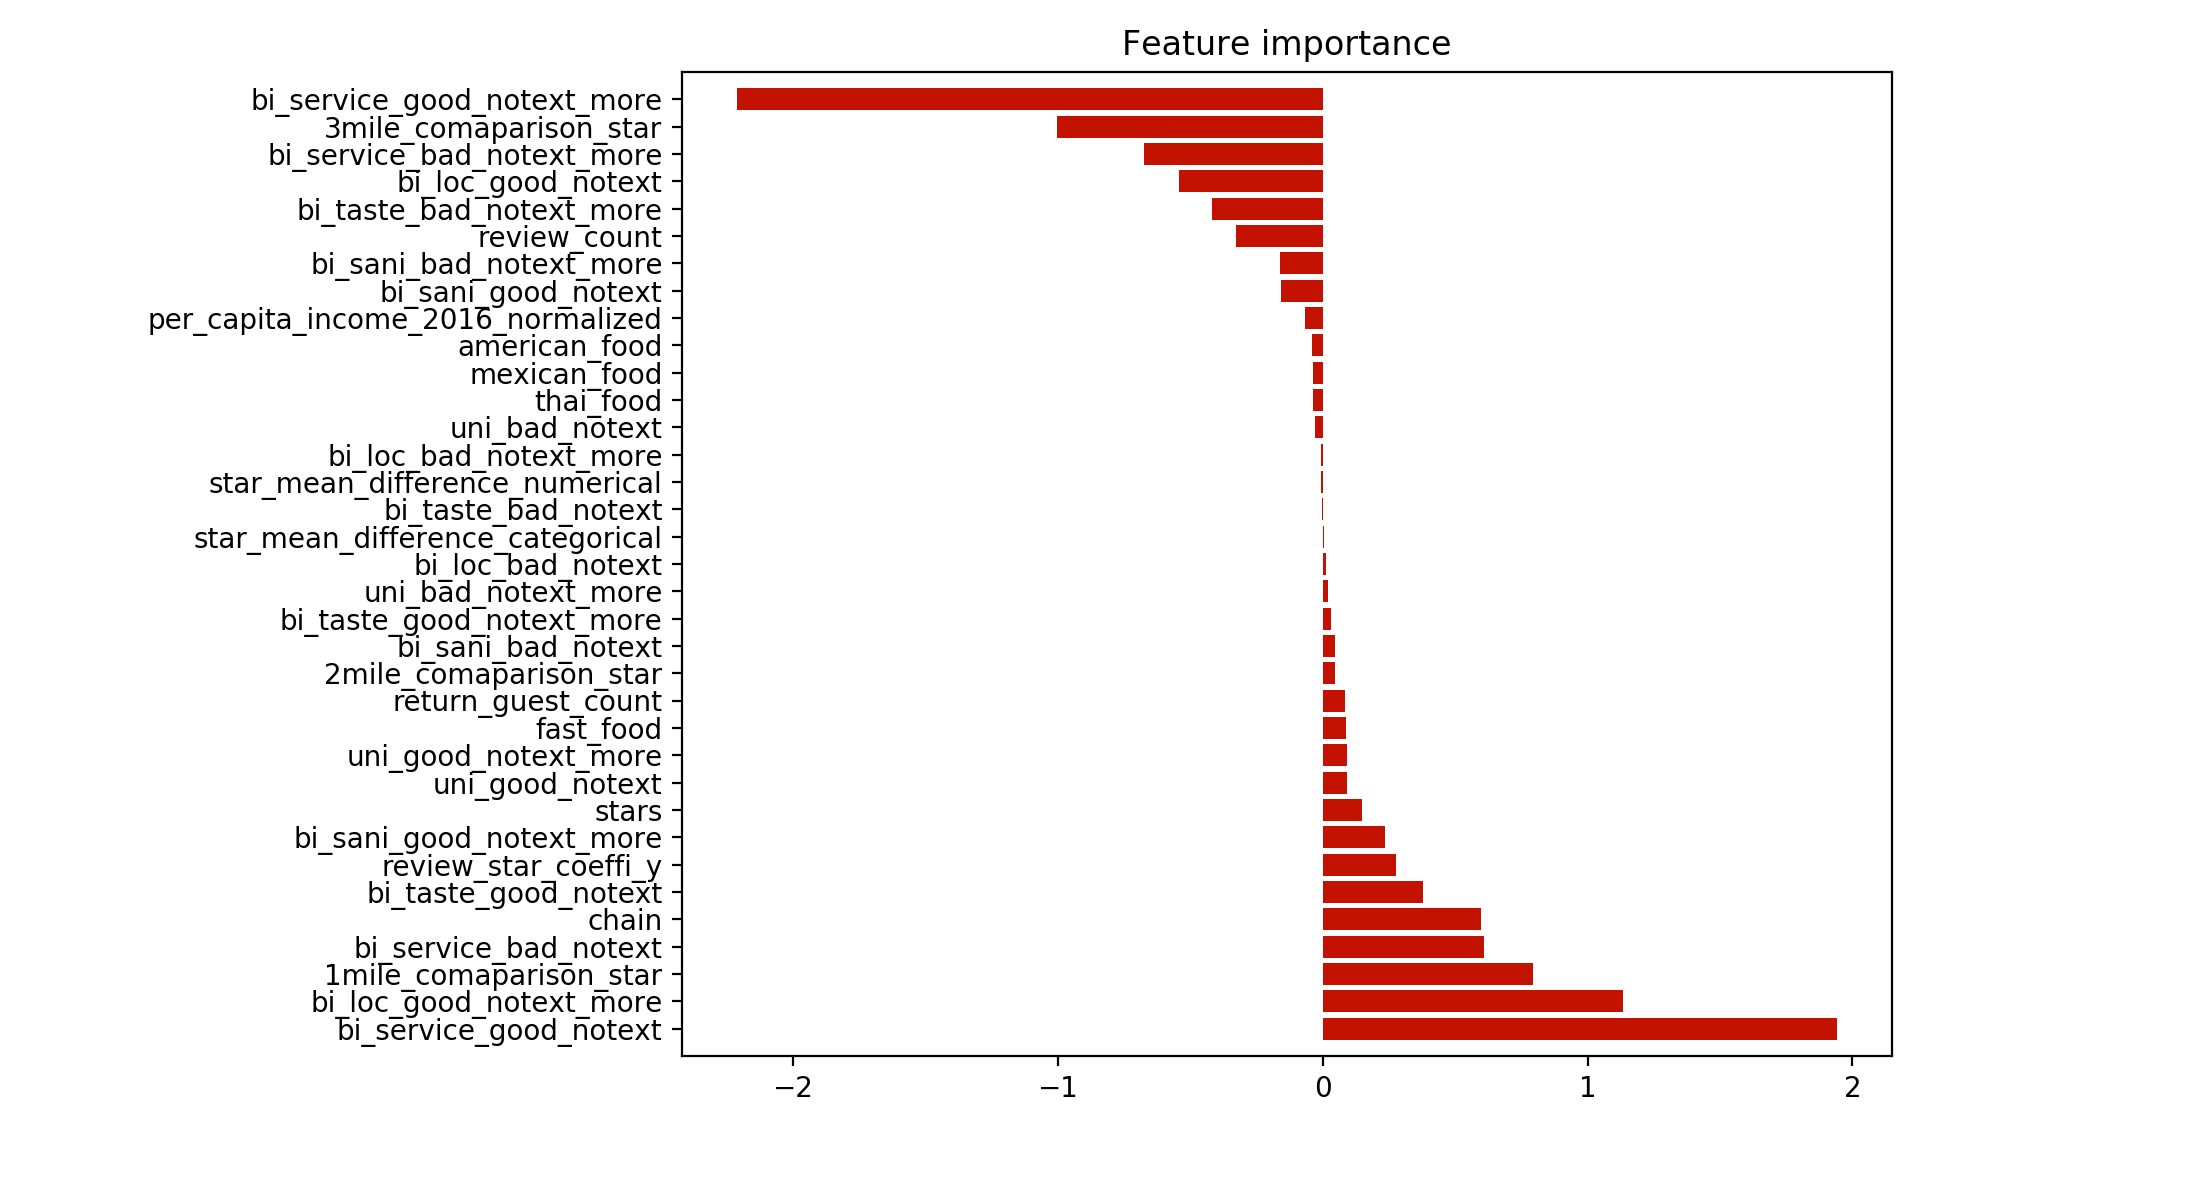

In [9]:
std = np.std(X_train, 0)*clf.coef_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(11,6))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importance[indices],
       color="#c41200")
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X_test.shape[1]])
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.31, bottom=0.12, right=0.86, top=0.94)

In [19]:
'''
normalized text feature then try ml
'''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
feature_table = pd.read_csv("/Users/luxiaopeng/notebook/inls613/closure_prediction/feature_table_with_w2c_nominal_py.csv")
labels = np.array(feature_table[['open_round10']], dtype=int)
label_names = np.array(['open', 'not_open'])

feature_names = np.array(["chain", \
                        "uni_good_notext","uni_bad_notext", \
                        "bi_sani_good_notext","bi_sani_bad_notext", \
                        "bi_loc_good_notext","bi_loc_bad_notext", \
                        "bi_service_good_notext","bi_service_bad_notext", \
                        "bi_taste_good_notext","bi_taste_bad_notext", \
                          "review_star_coeffi_y","return_guest_count","mexican_food", \
                          "fast_food","american_food","thai_food","stars","review_count", \
                          "star_mean_difference_numerical","star_mean_difference_categorical", \
                        "1mile_comaparison_star","2mile_comaparison_star", \
                        "3mile_comaparison_star","per_capita_income_2016_normalized", \
                        "uni_good_notext_more","uni_bad_notext_more", \
                        "bi_sani_good_notext_more","bi_sani_bad_notext_more", \
                        "bi_loc_good_notext_more","bi_loc_bad_notext_more", \
                        "bi_service_good_notext_more","bi_service_bad_notext_more", \
                        "bi_taste_good_notext_more","bi_taste_bad_notext_more"])

features = np.array(feature_table[["chain", \
                        "uni_good_notext","uni_bad_notext", \
                        "bi_sani_good_notext","bi_sani_bad_notext", \
                        "bi_loc_good_notext","bi_loc_bad_notext", \
                        "bi_service_good_notext","bi_service_bad_notext", \
                        "bi_taste_good_notext","bi_taste_bad_notext", \
                          "review_star_coeffi_y","return_guest_count","mexican_food", \
                          "fast_food","american_food","thai_food","stars","review_count", \
                          "star_mean_difference_numerical","star_mean_difference_categorical", \
                          "1mile_comaparison_star","2mile_comaparison_star", \
                        "3mile_comaparison_star","per_capita_income_2016_normalized", \
                        "uni_good_notext_more","uni_bad_notext_more", \
                        "bi_sani_good_notext_more","bi_sani_bad_notext_more", \
                        "bi_loc_good_notext_more","bi_loc_bad_notext_more", \
                        "bi_service_good_notext_more","bi_service_bad_notext_more", \
                        "bi_taste_good_notext_more","bi_taste_bad_notext_more"]], dtype=float)

#try ml here

train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.10,
                                                          random_state=37)

# Initialize our classifier
#clf = svm.SVC()
clf = LogisticRegression()
# Train our classifier
clf.fit(train, train_labels)

# Make predictions
preds = clf.predict(test)
# print(preds)
print(accuracy_score(test_labels, preds))

0.631578947368421


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# many thanks to code from https://github.com/alifier/Restaurant_success_model/blob/master/Restaurants_yelp_ML_final.ipynb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=37)
# logistic regression
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Accuracy:  0.6052631578947368
Precision:  0.6666666666666666
Recall:  0.45794392523364486
F1 Score:  0.5429362880886426
Confusion Matrix: 
 [[155  49]
 [116  98]]


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
importance = np.std(X_train, 0)*clf.coef_
importance = importance.reshape(-1)
#importance =importance + np.abs(np.min(importance))
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, feature_names[f], importance[f]))

1. feature: chain (0.600160)
2. feature: uni_good_notext (0.091275)
3. feature: uni_bad_notext (-0.030587)
4. feature: bi_sani_good_notext (-0.157733)
5. feature: bi_sani_bad_notext (0.045293)
6. feature: bi_loc_good_notext (-0.543321)
7. feature: bi_loc_bad_notext (0.011766)
8. feature: bi_service_good_notext (1.942840)
9. feature: bi_service_bad_notext (0.605162)
10. feature: bi_taste_good_notext (0.380251)
11. feature: bi_taste_bad_notext (-0.000320)
12. feature: review_star_coeffi_y (0.276999)
13. feature: return_guest_count (0.082713)
14. feature: mexican_food (-0.035539)
15. feature: fast_food (0.086337)
16. feature: american_food (-0.041101)
17. feature: thai_food (-0.035029)
18. feature: stars (0.145294)
19. feature: review_count (-0.328390)
20. feature: star_mean_difference_numerical (-0.004388)
21. feature: star_mean_difference_categorical (0.004231)
22. feature: 1mile_comaparison_star (0.793317)
23. feature: 2mile_comaparison_star (0.044954)
24. feature: 3mile_comaparison_st

<IPython.core.display.Javascript object>


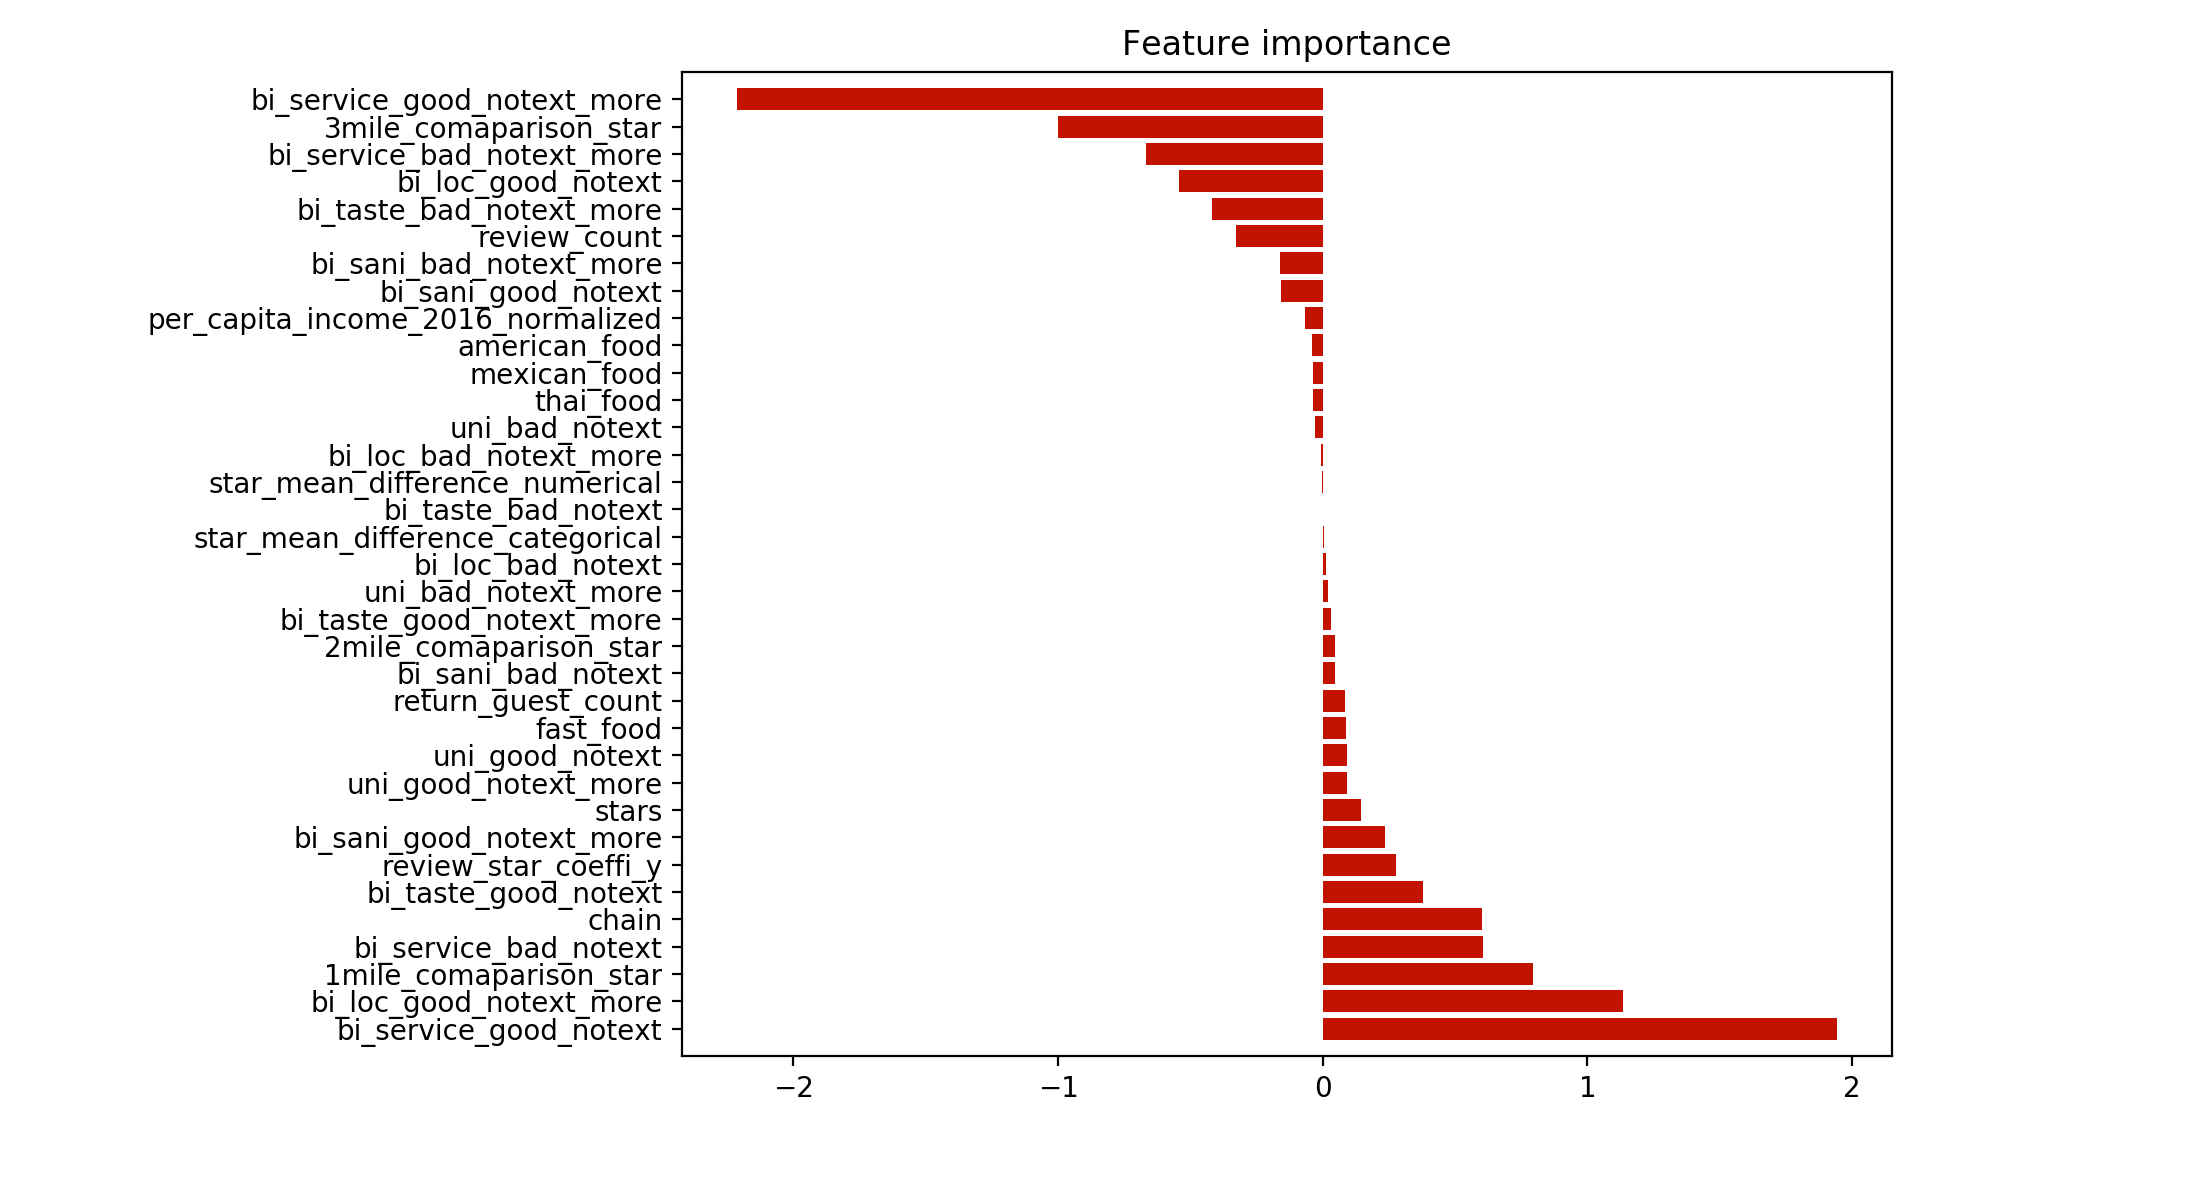

In [22]:
std = np.std(X_train, 0)*clf.coef_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(11,6))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importance[indices],
       color="#c41200")
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X_test.shape[1]])
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.31, bottom=0.12, right=0.86, top=0.94)

<IPython.core.display.Javascript object>


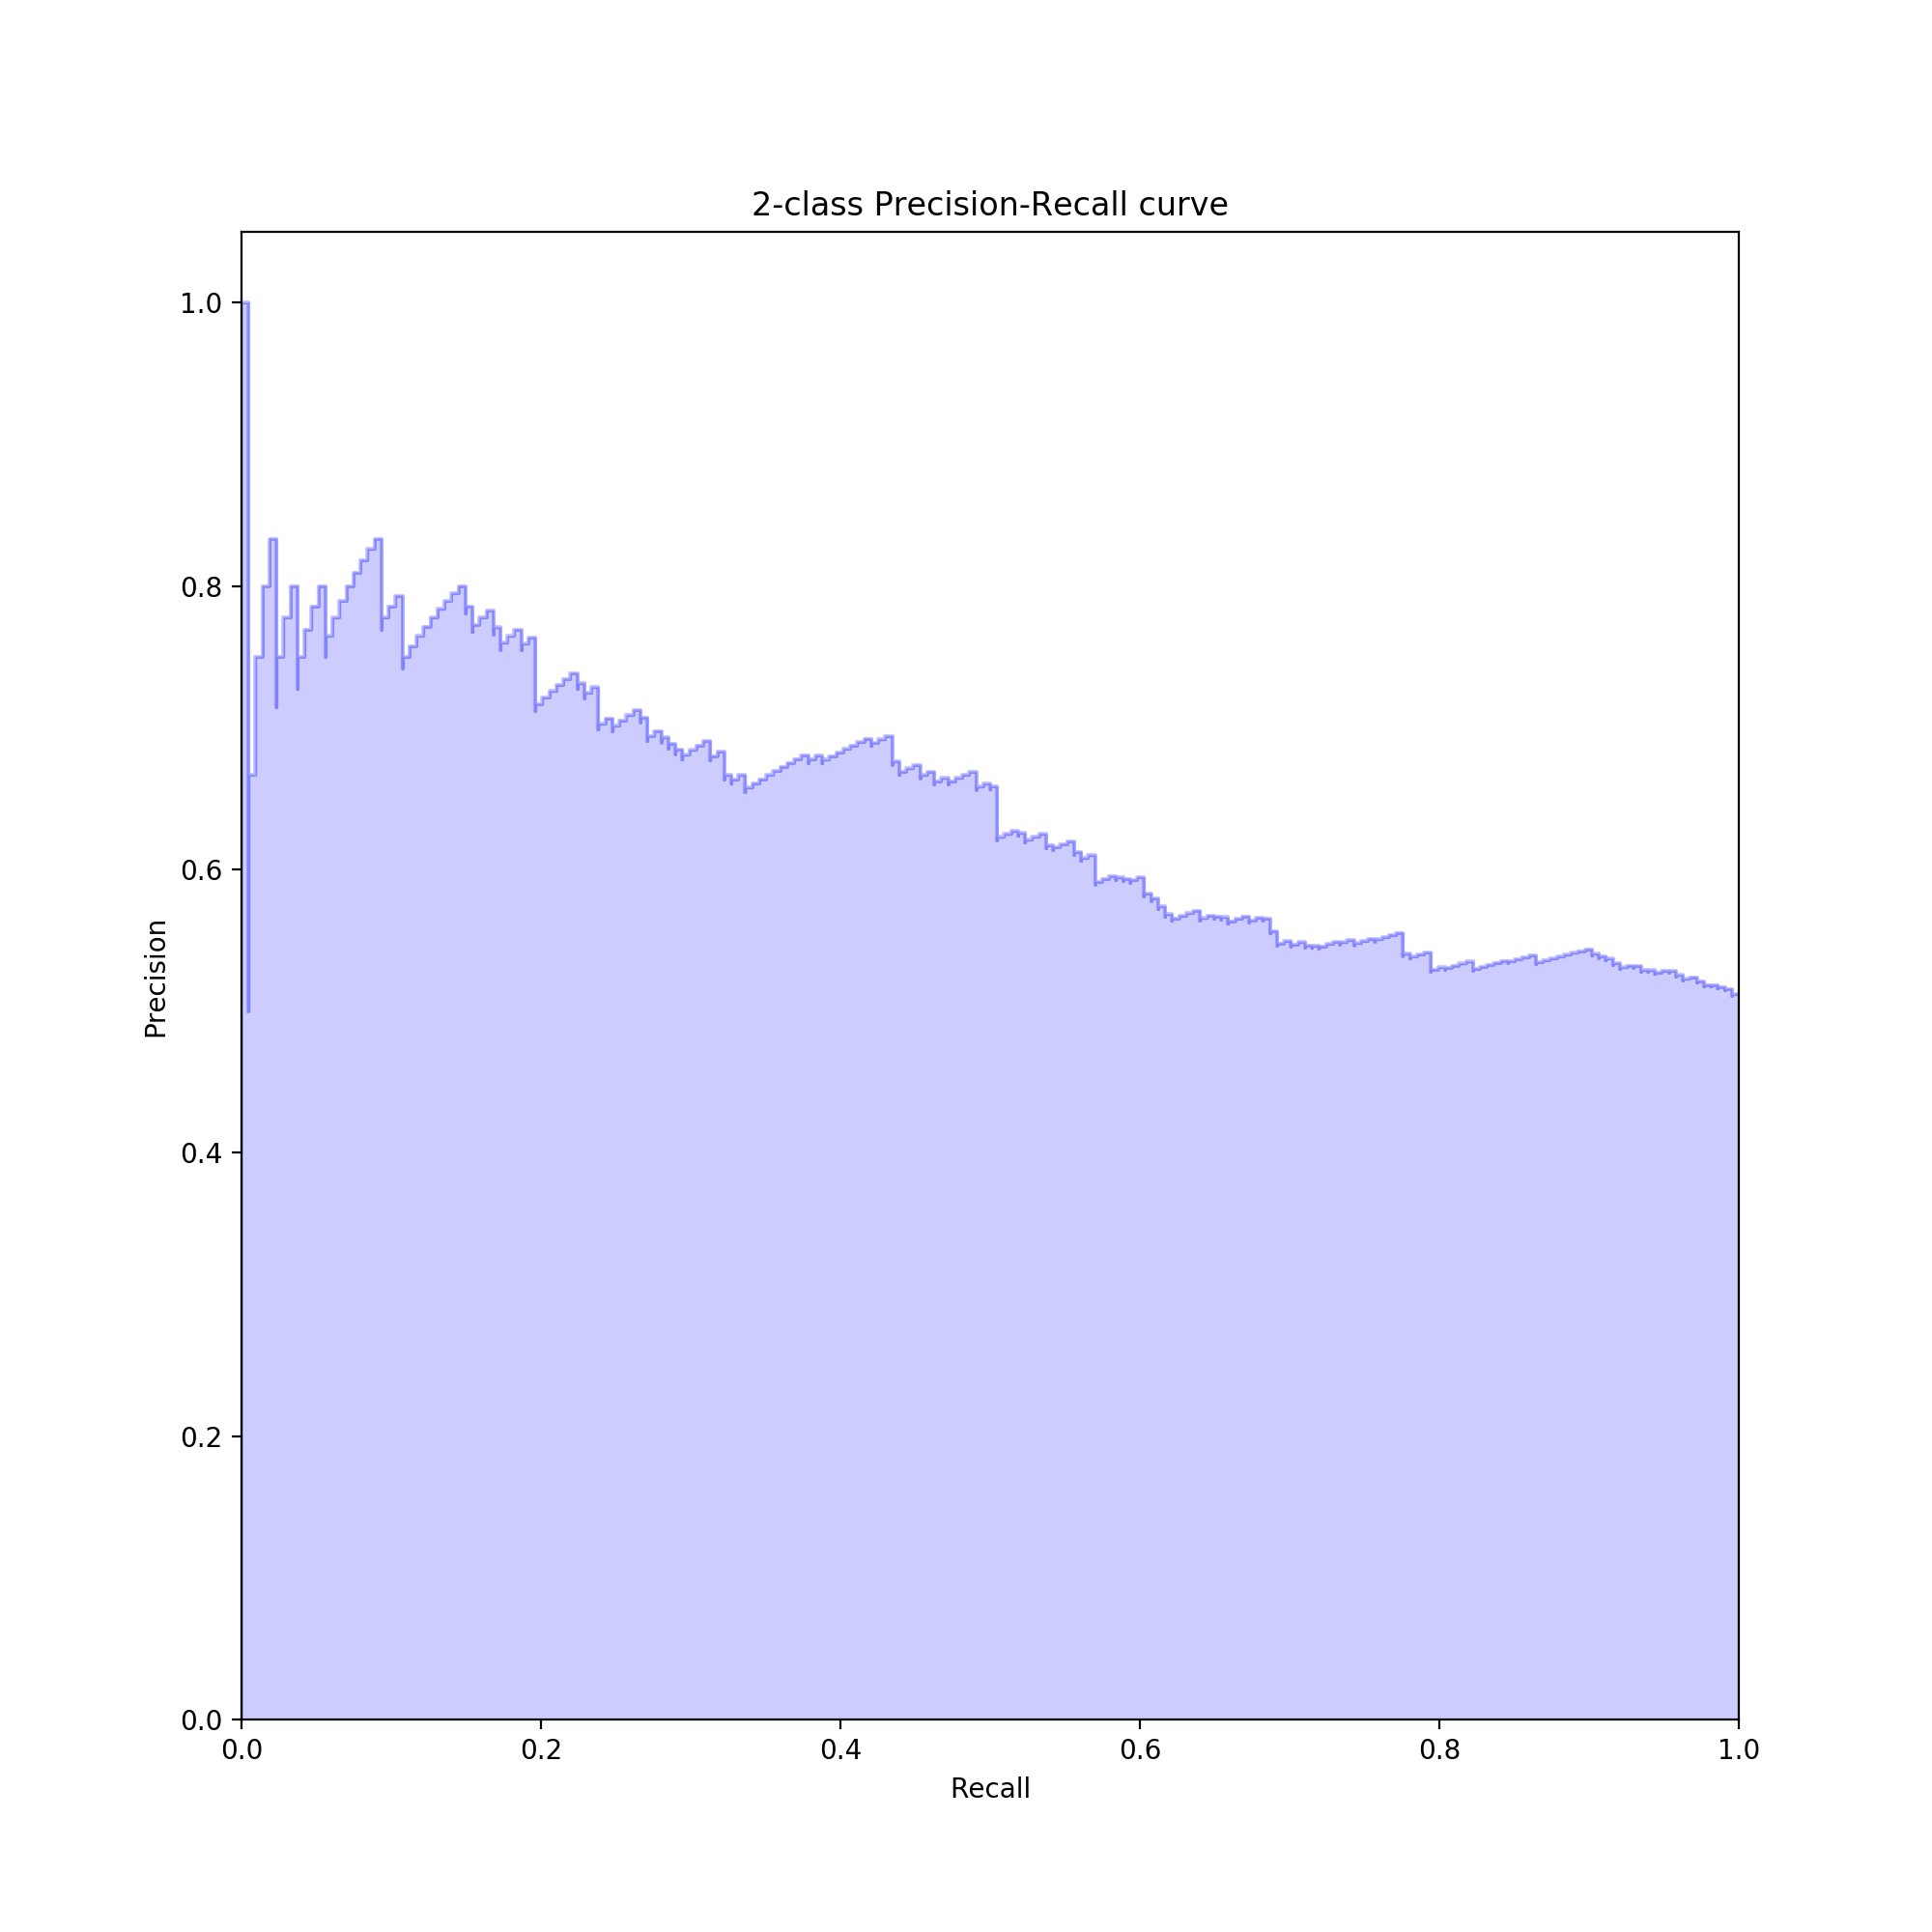

Text(0.5,1,'2-class Precision-Recall curve')

In [23]:
# try precision recall curve
%matplotlib notebook
fig = plt.gcf()
fig.set_size_inches(10, 10)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')